In [92]:
import pandas as pd
import json
import requests as req
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time

In [93]:
movie_df = pd.read_csv('movie_df.csv') #low_memory=False

movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])


movie_df = movie_df[movie_df["release_date"] > '2007']


del movie_df['budget']
del movie_df['Unnamed: 0']
del movie_df['vote_average']
del movie_df['vote_count']

movie_df = movie_df[movie_df.revenue != 0.0]      #CHANGE LATER
len(movie_df)

2451

In [94]:
url = "http://www.omdbapi.com/?i="
rating_list = []
for ID in movie_df['imdb_id']:
    response = req.get(url+ID+"&apikey=trilogy")
    response = response.json()
    
    final_response = (response['Title'],
               response['imdbRating'],
               response['imdbVotes'],
                     response['Genre'])
    rating_list.append(final_response)

In [127]:
ratings = pd.DataFrame(rating_list, columns = ('title','rating','rating count', 'Genre'))

In [130]:
my_ratings = []
for i in ratings['Genre']:
   help = i.split(',')
   my_ratings.append((help[0]))
my_ratings

#del movie_df['Rating Count']
movie_df.reset_index(drop=True,inplace=True)
ratings['genre'] = my_ratings
#del ratings['Genre']
ratings.head(3)

,title,rating,rating count,Genre,genre
0,Day of the Falcon,6.7,"9,810","Adventure, Drama, History",Adventure
1,Freedom Writers,7.5,"57,032","Biography, Crime, Drama",Biography
2,Code Name: The Cleaner,4.5,"10,275","Action, Comedy, Crime",Action


In [133]:
#del ratings['Genre']
ratings.columns

Index(['title', 'rating', 'rating count', 'genre'], dtype='object')

In [135]:
merge_df = pd.merge(movie_df, ratings, on = 'title')
del merge_df['Genre']

In [137]:
merge_df['rating'] = merge_df['rating'].astype('float')

merge_df.columns


Index(['belongs_to_collection', 'id', 'imdb_id', 'original_language',
       'overview', 'release_date', 'revenue', 'title', 'rating',
       'rating count', 'genre'],
      dtype='object')

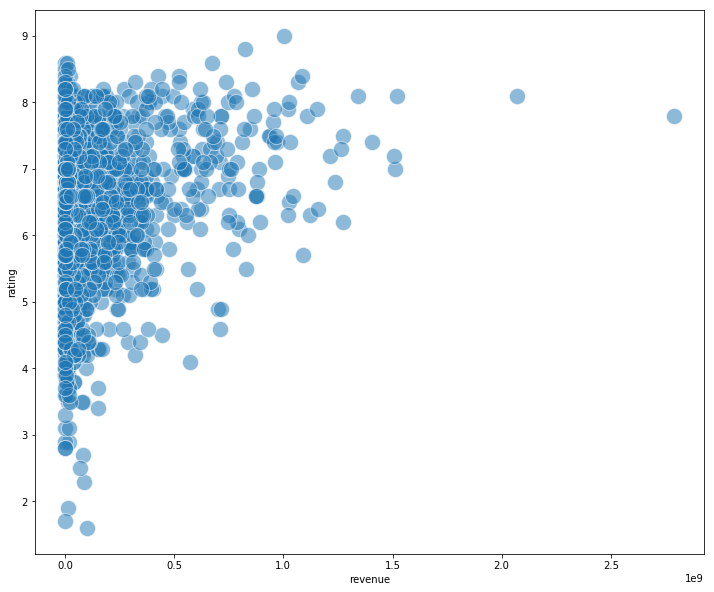

In [186]:

merge_df.plot(kind="scatter", x = 'revenue', y = 'rating',s = 260, alpha = 0.5, figsize=(12,10), 
             edgecolors = 'w')
plt.savefig('ratingsvrevenue.png')
plt.show()
